In [55]:
import pandas as pd
import os
import glob

In [56]:
import os
import glob
import pandas as pd

# Caminho da pasta com os arquivos
caminho_pasta = r'C:\Users\zirn\Desktop\TechChallenge\Data_setClima_ INMET'

# Lista todos os arquivos .csv da pasta
arquivos_csv = glob.glob(os.path.join(caminho_pasta, '*.csv'))

# Lista para armazenar os DataFrames
dfs = []

# Loop pelos arquivos
for arquivo in arquivos_csv:
    try:
        with open(arquivo, 'r', encoding='utf-8') as f:
            linhas = f.readlines()

        # Extrair os metadados
        metadados = {}
        linha_header = None
        for i, linha in enumerate(linhas):
            if linha.strip() == "":
                continue
            if linha.startswith("Data Medicao"):
                linha_header = i
                break
            if ":" in linha:
                chave, valor = linha.strip().split(":", 1)
                metadados[chave.strip()] = valor.strip()

        # Verifica se encontrou o cabeçalho
        if linha_header is None:
            print(f"⚠️ Cabeçalho não encontrado em {arquivo}, pulando arquivo.")
            continue

        # Carregar a tabela de dados
        df = pd.read_csv(arquivo, sep=";", skiprows=linha_header, encoding='utf-8')

        # Adiciona os metadados
        for chave, valor in metadados.items():
            df[chave] = valor

        dfs.append(df)

    except Exception as e:
        print(f"❌ Erro ao processar {arquivo}: {e}")

# Concatenar os DataFrames
if dfs:
    df_geral = pd.concat(dfs, ignore_index=True)
    print("✅ Dados concatenados com sucesso!")
else:
    print("⚠️ Nenhum DataFrame carregado. Verifique os arquivos na pasta.")


✅ Dados concatenados com sucesso!


In [57]:
df_geral['Data Medicao'] = pd.to_datetime(df_geral['Data Medicao'], errors='coerce', dayfirst=True)


C:\Users\zirn\AppData\Local\Temp\ipykernel_68268\3715602510.py:1: UserWarning:

Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.



In [58]:
print(df_geral.columns)


Index(['Data Medicao', 'PRECIPITACAO TOTAL, MENSAL (AUT)(mm)',
       'PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)',
       'TEMPERATURA MEDIA, MENSAL (AUT)(°C)',
       'VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)', 'Unnamed: 5', 'Nome',
       'Codigo Estacao', 'Latitude', 'Longitude', 'Altitude', 'Situacao',
       'Data Inicial', 'Data Final', 'Periodicidade da Medicao'],
      dtype='object')


In [59]:
print(df_geral.isnull().sum())


Data Medicao                                       0
PRECIPITACAO TOTAL, MENSAL (AUT)(mm)            3303
PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)     2131
TEMPERATURA MEDIA, MENSAL (AUT)(°C)             1841
VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)       2707
Unnamed: 5                                     15647
Nome                                               0
Codigo Estacao                                     0
Latitude                                           0
Longitude                                          0
Altitude                                           0
Situacao                                           0
Data Inicial                                       0
Data Final                                         0
Periodicidade da Medicao                           0
dtype: int64


In [60]:
colunas_para_remover = [
    'Unnamed: 5', 'Situacao', 'Data Inicial',
    'Data Final', 'Periodicidade da Medicao'
]
df_geral.drop(columns=colunas_para_remover, inplace=True)


In [61]:
df_geral.rename(columns={
    'Data Medicao': 'Data',
    'PRECIPITACAO TOTAL, MENSAL (AUT)(mm)': 'Precipitacao_mm',
    'PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)': 'Pressao_mB',
    'TEMPERATURA MEDIA, MENSAL (AUT)(°C)': 'Temperatura_C',
    'VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)': 'Vento_m_s'
}, inplace=True)


In [62]:
df_geral['Data'] = pd.to_datetime(df_geral['Data'], errors='coerce', dayfirst=True)
df_geral = df_geral.dropna(subset=['Data'])  


In [63]:
print(df_geral.head())
print(df_geral.dtypes)


        Data Precipitacao_mm Pressao_mB Temperatura_C Vento_m_s      Nome  \
0 2010-01-31           391,4      996,6          24,6       2,2  ALEGRETE   
1 2010-02-28             NaN        NaN           NaN       NaN  ALEGRETE   
2 2010-03-31             NaN        NaN           NaN       NaN  ALEGRETE   
3 2010-04-30             NaN        NaN           NaN       NaN  ALEGRETE   
4 2010-05-31           100,2     1003,4          15,5       1,9  ALEGRETE   

  Codigo Estacao      Latitude     Longitude Altitude  
0           A826  -29.70916666  -55.52555554   120.88  
1           A826  -29.70916666  -55.52555554   120.88  
2           A826  -29.70916666  -55.52555554   120.88  
3           A826  -29.70916666  -55.52555554   120.88  
4           A826  -29.70916666  -55.52555554   120.88  
Data               datetime64[ns]
Precipitacao_mm            object
Pressao_mB                 object
Temperatura_C              object
Vento_m_s                  object
Nome                       obje

In [64]:
colunas_numericas = ['Precipitacao_mm', 'Pressao_mB', 'Temperatura_C', 'Vento_m_s']

for coluna in colunas_numericas:
    df_geral[coluna] = (
        df_geral[coluna]
        .str.replace(',', '.', regex=False)  # troca vírgula por ponto
        .astype(float)                      # converte para float
    )
df_geral['Latitude'] = df_geral['Latitude'].astype(float)
df_geral['Longitude'] = df_geral['Longitude'].astype(float)
df_geral['Altitude'] = df_geral['Altitude'].astype(float)


In [65]:
print(df_geral.dtypes)
print(df_geral.describe())


Data               datetime64[ns]
Precipitacao_mm           float64
Pressao_mB                float64
Temperatura_C             float64
Vento_m_s                 float64
Nome                       object
Codigo Estacao             object
Latitude                  float64
Longitude                 float64
Altitude                  float64
dtype: object
                                Data  Precipitacao_mm    Pressao_mB  \
count                          15647     12344.000000  13516.000000   
mean   2018-02-08 17:27:07.327922432       141.296760    958.055919   
min              2010-01-31 00:00:00         0.000000    818.100000   
25%              2014-04-30 00:00:00        72.400000    924.100000   
50%              2018-03-31 00:00:00       123.200000    961.100000   
75%              2021-11-30 00:00:00       190.600000   1001.100000   
max              2025-06-30 00:00:00       773.800000   1024.800000   
std                              NaN        95.089552     43.391476   

      

In [66]:
df_geral.dropna(inplace=True)


In [67]:
print(df_geral.isnull().sum())  # Ver quantos NaNs ainda existem por coluna
print(df_geral.shape)           # Ver tamanho atual do DataFrame


Data               0
Precipitacao_mm    0
Pressao_mB         0
Temperatura_C      0
Vento_m_s          0
Nome               0
Codigo Estacao     0
Latitude           0
Longitude          0
Altitude           0
dtype: int64
(11763, 10)


In [68]:
df_geral['Ano'] = df_geral['Data'].dt.year
df_geral['Mes'] = df_geral['Data'].dt.month


In [69]:
import plotly.express as px

fig = px.line(df_geral, x='Data', y='Temperatura_C', color='Nome',
              title='Evolução da Temperatura Média ao Longo do Tempo')
fig.show()


In [70]:
import folium
from folium.plugins import HeatMap

# Criar o mapa base centrado no Rio Grande do Sul
mapa = folium.Map(location=[-30.0, -53.0], zoom_start=7)

# Preparar os dados para o HeatMap
dados = df_geral[['Latitude', 'Longitude', 'Temperatura_C']].dropna()
pontos = dados[['Latitude', 'Longitude', 'Temperatura_C']].values.tolist()

# Adicionar o HeatMap ao mapa
HeatMap(pontos).add_to(mapa)

# Salvar o mapa em um arquivo HTML
mapa.save("mapa_calor_rs.html")


In [71]:
import plotly.express as px

# Criar o gráfico de dispersão com base nas coordenadas e temperatura
fig = px.density_mapbox(df_geral, lat='Latitude', lon='Longitude', z='Temperatura_C',
                        radius=10, center={"lat": -30.0, "lon": -53.0},
                        zoom=7, mapbox_style="carto-positron")

# Exibir o gráfico
fig.show()


In [72]:
df_geral

,Data,Precipitacao_mm,Pressao_mB,Temperatura_C,Vento_m_s,Nome,Codigo Estacao,Latitude,Longitude,Altitude,Ano,Mes
0,2010-01-31,391.4,996.6,24.6,2.2,ALEGRETE,A826,-29.709167,-55.525556,120.88,2010,1
4,2010-05-31,100.2,1003.4,15.5,1.9,ALEGRETE,A826,-29.709167,-55.525556,120.88,2010,5
5,2010-06-30,50.8,1004.4,14.1,1.9,ALEGRETE,A826,-29.709167,-55.525556,120.88,2010,6
6,2010-07-31,246.0,1004.5,13.0,2.0,ALEGRETE,A826,-29.709167,-55.525556,120.88,2010,7
7,2010-08-31,20.2,1004.7,14.1,2.5,ALEGRETE,A826,-29.709167,-55.525556,120.88,2010,8
...,...,...,...,...,...,...,...,...,...,...,...,...
15637,2024-09-30,73.8,915.7,20.2,1.8,XANXERE,A858,-26.938611,-52.398056,878.74,2024,9
15638,2024-10-31,60.8,914.8,20.0,1.4,XANXERE,A858,-26.938611,-52.398056,878.74,2024,10
15639,2024-11-30,84.6,913.6,21.4,1.0,XANXERE,A858,-26.938611,-52.398056,878.74,2024,11
15640,2024-12-31,93.0,912.7,20.7,1.1,XANXERE,A858,-26.938611,-52.398056,878.74,2024,12


In [74]:
# Verificar quantos valores nulos existem em cada coluna
valores_nulos = df_geral.isnull().sum()

# Exibir as colunas com valores nulos
print(valores_nulos)


Data               0
Precipitacao_mm    0
Pressao_mB         0
Temperatura_C      0
Vento_m_s          0
Nome               0
Codigo Estacao     0
Latitude           0
Longitude          0
Altitude           0
Ano                0
Mes                0
dtype: int64


In [76]:
df_geral.describe()  # Para obter as estatísticas básicas (média, min, max, etc.)


,Data,Precipitacao_mm,Pressao_mB,Temperatura_C,Vento_m_s,Latitude,Longitude,Altitude,Ano,Mes
count,11763,11763.000000,11763.000000,11763.000000,11763.000000,11763.000000,11763.000000,11763.000000,11763.000000,11763.000000
mean,2017-08-29 23:54:36.817138688,141.049987,960.141928,19.148338,2.396566,-27.759131,-52.021000,484.877159,2017.128454,6.444189
min,2010-01-31 00:00:00,0.000000,818.100000,6.000000,0.000000,-33.742222,-57.081944,2.000000,2010.000000,1.000000
25%,2013-09-30 00:00:00,72.200000,925.900000,16.200000,1.600000,-29.350278,-53.514167,106.990000,2013.000000,3.000000
50%,2017-09-30 00:00:00,123.000000,962.300000,19.400000,2.400000,-27.890556,-52.167778,455.270000,2017.000000,6.000000
75%,2021-04-30 00:00:00,190.600000,1002.200000,22.300000,3.100000,-26.248611,-50.180556,799.580000,2021.000000,10.000000
max,2025-05-31 00:00:00,773.800000,1024.800000,29.500000,10.100000,-22.639444,-48.326111,1790.380000,2025.000000,12.000000
std,NaN,94.896545,42.481842,3.993115,1.265062,2.367624,2.036295,384.188260,4.438349,3.528109


In [80]:
# Garantir que a coluna correta de data esteja no formato datetime
df_geral['Data'] = pd.to_datetime(df_geral['Data'])

# Agora, agrupar os dados por ano e mês para análise
df_geral['Ano'] = df_geral['Data'].dt.year
df_geral['Mes'] = df_geral['Data'].dt.month


In [84]:
# Agrupar por ano e mês para calcular as médias
df_geral_mensal = df_geral.groupby(['Ano', 'Mes']).agg({
    'Precipitacao_mm': 'mean',    # Média de precipitação
    'Temperatura_C': 'mean',      # Média de temperatura
    'Vento_m_s': 'mean'           # Média de vento
}).reset_index()

# Exibir as primeiras linhas para checar
df_geral_mensal


,Ano,Mes,Precipitacao_mm,Temperatura_C,Vento_m_s
0,2010,1,218.093548,23.116129,2.451613
1,2010,2,160.442623,23.965574,2.485246
2,2010,3,147.028571,21.912698,2.276190
3,2010,4,161.863492,18.838095,2.519048
4,2010,5,158.652459,15.316393,2.526230
...,...,...,...,...,...
180,2025,1,105.820339,23.128814,2.223729
181,2025,2,124.992453,24.492453,1.973585
182,2025,3,70.189474,22.921053,2.014035
183,2025,4,111.327273,18.352727,1.876364


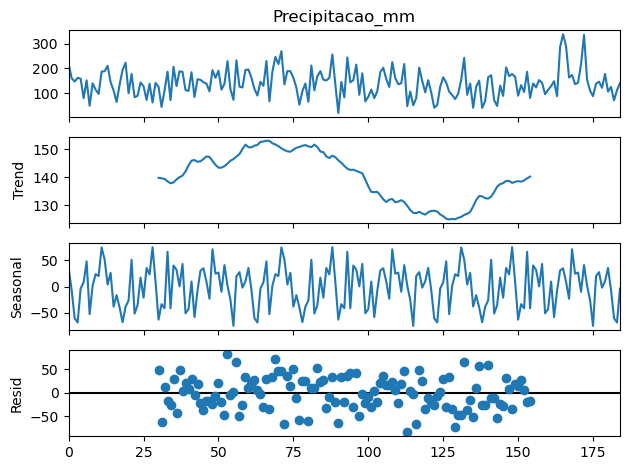

In [97]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Decompor a série temporal de Precipitação
result = sm.tsa.seasonal_decompose(df_geral_mensal['Precipitacao_mm'], model='additive', period=60)

# Plotando a decomposição
result.plot()
plt.show()


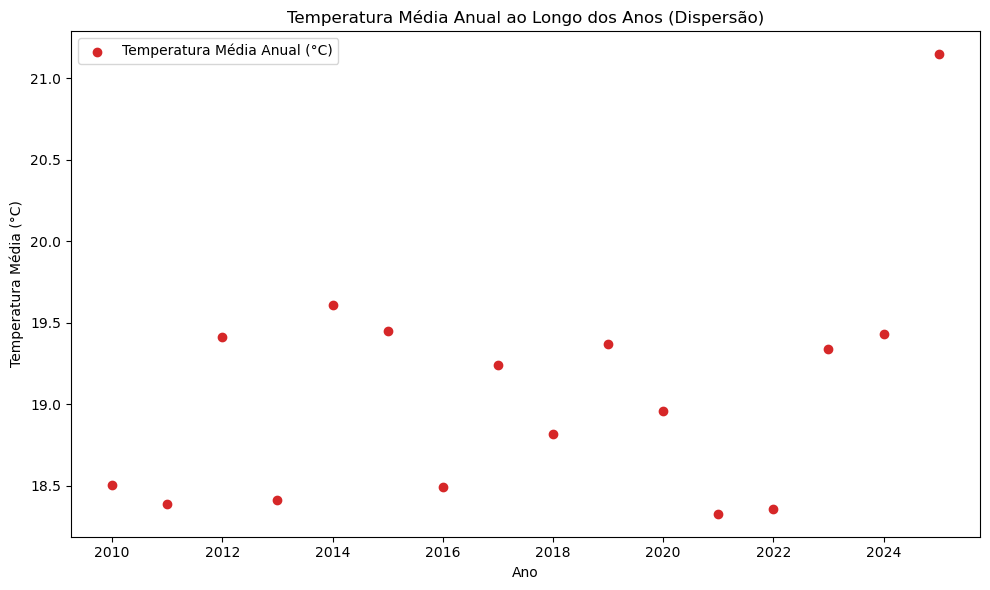

In [95]:
# Agrupar por ano para calcular a média anual de Temperatura
df_geral_anual = df_geral_mensal.groupby('Ano').agg({
    'Temperatura_C': 'mean'
}).reset_index()

# Gráfico de Dispersão com a Média Anual de Temperatura
plt.figure(figsize=(10, 6))
plt.scatter(df_geral_anual['Ano'], df_geral_anual['Temperatura_C'], label='Temperatura Média Anual (°C)', color='tab:red')
plt.xlabel('Ano')
plt.ylabel('Temperatura Média (°C)')
plt.title('Temperatura Média Anual ao Longo dos Anos (Dispersão)')
plt.legend()
plt.tight_layout()
plt.show()


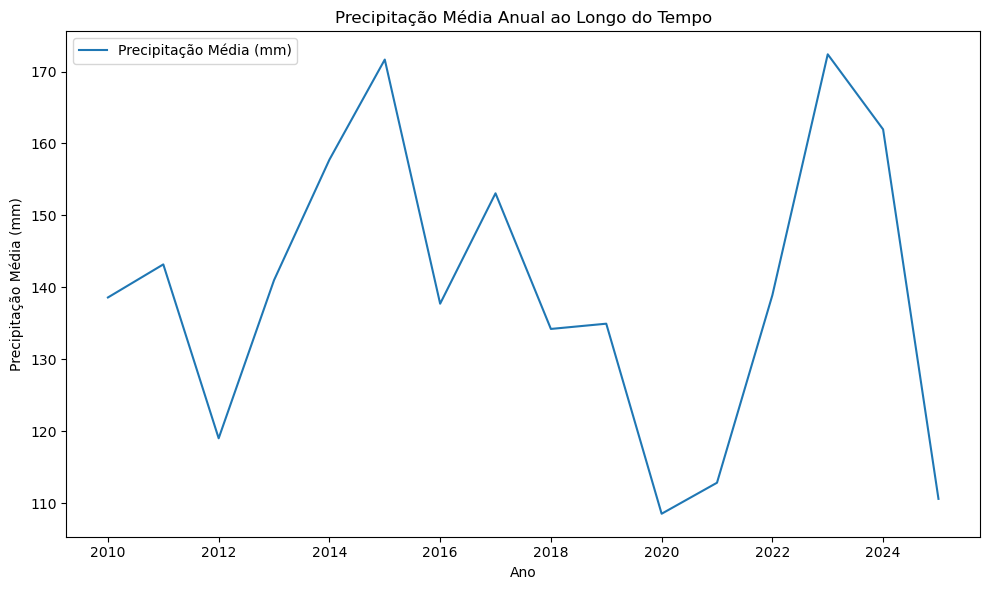

In [96]:
# Agrupar por ano para calcular a média anual de Precipitação
df_geral_anual_precipitacao = df_geral_mensal.groupby('Ano').agg({
    'Precipitacao_mm': 'mean'
}).reset_index()

# Gráfico de Precipitação Média Anual
plt.figure(figsize=(10, 6))
plt.plot(df_geral_anual_precipitacao['Ano'], df_geral_anual_precipitacao['Precipitacao_mm'], label='Precipitação Média (mm)', color='tab:blue')
plt.xlabel('Ano')
plt.ylabel('Precipitação Média (mm)')
plt.title('Precipitação Média Anual ao Longo do Tempo')
plt.legend()
plt.tight_layout()
plt.show()


In [103]:
# Agrupar por ano e calcular estatísticas resumidas
df_resumo_anual = df_geral_mensal.groupby('Ano').agg({
    'Temperatura_C': ['mean', 'max', 'min'],
    'Precipitacao_mm': ['mean', 'max', 'min'],
    'Vento_m_s': ['mean', 'max', 'min']
}).reset_index()

# Renomear colunas para facilitar visualização
df_resumo_anual.columns = ['Ano',
    'Temperatura_C_mean', 'Temperatura_C_max', 'Temperatura_C_min',
    'Precipitacao_mm_mean', 'Precipitacao_mm_max', 'Precipitacao_mm_min',
    'Vento_m_s_mean', 'Vento_m_s_max', 'Vento_m_s_min'
]

# Exibir as 5 primeiras linhas
print(df_resumo_anual.head())


    Ano  Temperatura_C_mean  Temperatura_C_max  Temperatura_C_min  \
0  2010           18.501783          23.965574          14.024194   
1  2011           18.384845          23.600000          13.126471   
2  2012           19.411863          23.961404          13.170833   
3  2013           18.410761          23.233824          13.533846   
4  2014           19.606506          24.127692          14.986792   

   Precipitacao_mm_mean  Precipitacao_mm_max  Precipitacao_mm_min  \
0            138.600572           218.093548            48.495082   
1            143.197044           223.630508            63.597059   
2            119.029414           207.097222            43.679452   
3            141.005341           188.575000            84.083077   
4            157.748645           233.142857            72.447458   

   Vento_m_s_mean  Vento_m_s_max  Vento_m_s_min  
0        2.657370       3.006557       2.276190  
1        2.711281       3.330508       2.246032  
2        2.573658   

In [106]:
df_geral_mensal.to_csv('resumo_climatico_anual_detalhado.csv', index=False)
